# Figures for Corpora Comparison between bioRxiv,  Pubmed Central, New York Times

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from cairosvg import svg2png
from IPython.display import Image
import plotnine as p9

from annorxiver_modules.corpora_comparison_helper import (
    calculate_confidence_intervals,
    create_lemma_count_df,
    plot_bargraph,
    plot_point_bar_figure,
)

In [2]:
subset = 20

# KL Divergence Graph

In [3]:
kl_divergence_df = pd.read_csv(
    "output/comparison_stats/corpora_kl_divergence.tsv", sep="\t"
)
kl_divergence_df.head()

,num_terms,KL_divergence,comparison
0,100,0.023430,biorxiv_vs_pmc
1,100,0.473538,biorxiv_vs_nytac
2,100,0.294210,pmc_vs_nytac
3,200,0.037528,biorxiv_vs_pmc
4,200,0.639116,biorxiv_vs_nytac


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/corpora_kl_divergence.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/figures/corpora_kl_divergence.png


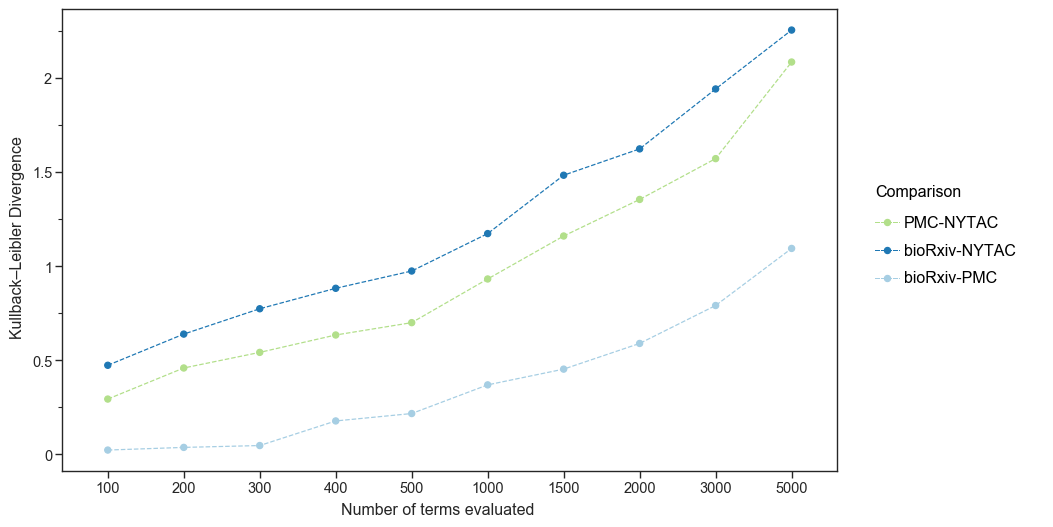

<ggplot: (8764031990725)>


In [4]:
g = (
    p9.ggplot(
        kl_divergence_df.replace(
            {
                "biorxiv_vs_pmc": "bioRxiv-PMC",
                "biorxiv_vs_nytac": "bioRxiv-NYTAC",
                "pmc_vs_nytac": "PMC-NYTAC",
            }
        ).rename(index=str, columns={"comparison": "Comparison"})
    )
    + p9.aes(
        x="factor(num_terms)",
        y="KL_divergence",
        fill="Comparison",
        color="Comparison",
        group="Comparison",
    )
    + p9.geom_point(size=2)
    + p9.geom_line(linetype="dashed")
    + p9.scale_fill_brewer(type="qual", palette="Paired", direction=-1)
    + p9.scale_color_brewer(
        type="qual",
        palette="Paired",
        direction=-1,
    )
    + p9.labs(
        x="Number of terms evaluated",
        y="Kullback–Leibler Divergence",
    )
    + p9.theme_seaborn(
        context="paper",
        style="ticks",
        font_scale=1.2,
    )
    + p9.theme(figure_size=(10, 6), text=p9.element_text(family="Arial"))
)
g.save("output/svg_files/corpora_kl_divergence.svg")
g.save("output/figures/corpora_kl_divergence.png", dpi=500)
print(g)

# bioRxiv vs Pubmed Central

In [5]:
full_text_comparison = pd.read_csv(
    "output/comparison_stats/biorxiv_vs_pmc_comparison.tsv", sep="\t"
)
full_text_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,time,615363,11258014,262494660,5365015381,6916.010681,1.117172
1,test,360585,6824993,262494660,5365015381,1971.939941,1.079831
2,increased,243041,6530384,262494660,5365015381,19089.367004,0.760661
3,model,730123,8136668,262494660,5365015381,208450.000793,1.834003
4,al,1754312,17451861,262494660,5365015381,678998.794312,2.054545


## Line Plots

In [6]:
full_plot_df = calculate_confidence_intervals(full_text_comparison)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
0,time,615363,11258014,262494660,5365015381,6916.010681,1.117172,1.114306,1.120046,84.536820,0.0
1,test,360585,6824993,262494660,5365015381,1971.939941,1.079831,1.076218,1.083456,44.917547,0.0
2,increased,243041,6530384,262494660,5365015381,19089.367004,0.760661,0.757586,0.763749,-132.362691,0.0
3,model,730123,8136668,262494660,5365015381,208450.000793,1.834003,1.829610,1.838405,495.779800,0.0
4,al,1754312,17451861,262494660,5365015381,678998.794312,2.054545,2.051348,2.057747,906.233829,0.0


In [7]:
plot_df = (
    full_plot_df.sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_df.sort_values("odds_ratio", ascending=False).iloc[:-2].tail(subset)
    )
    .replace("rna", "RNA")
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x)),
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
12,neurons,245673,1628424,262494660,5365015381,205552.058197,1.624557,1.618434,1.630680,520.045969,0.0
11,genome,310549,2157447,262494660,5365015381,242049.757538,1.556790,1.551360,1.562220,561.930985,0.0
91,genetic,246116,2193087,262494660,5365015381,122719.776398,1.197670,1.191656,1.203683,390.341257,0.0
103,regions,276621,2613208,262494660,5365015381,121417.507721,1.113383,1.107726,1.119040,385.786100,0.0
4,al,1754312,17451861,262494660,5365015381,678998.794312,1.038819,1.036572,1.041065,906.233829,0.0


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_odds.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_odds.png


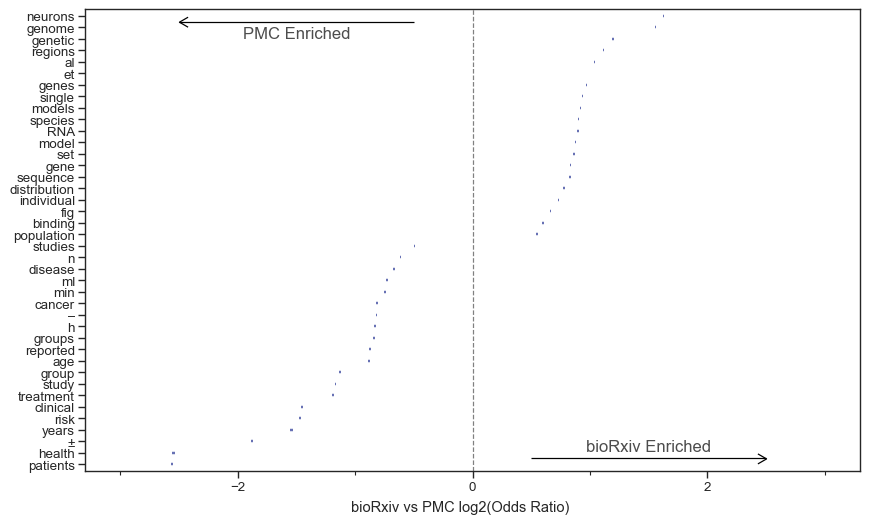

<ggplot: (-9223363272828520809)>


In [8]:
g = (
    p9.ggplot(
        plot_df, p9.aes(y="lemma", x="lower_odds", xend="upper_odds", yend="lemma")
    )
    + p9.geom_segment(color="#253494", size=1, alpha=0.7)
    + p9.scale_y_discrete(
        limits=(plot_df.sort_values("odds_ratio", ascending=True).lemma.tolist())
    )
    + p9.scale_x_continuous(limits=(-3, 3))
    + p9.geom_vline(p9.aes(xintercept=0), linetype="--", color="grey")
    + p9.annotate(
        "segment",
        x=0.5,
        xend=2.5,
        y=1.5,
        yend=1.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="bioRxiv Enriched", x=1.5, y=2.5, size=12, alpha=0.7)
    + p9.annotate(
        "segment",
        x=-0.5,
        xend=-2.5,
        y=39.5,
        yend=39.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="PMC Enriched", x=-1.5, y=38.5, size=12, alpha=0.7)
    + p9.theme_seaborn(context="paper", style="ticks", font_scale=1.1, font="Arial")
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(y=None, x="bioRxiv vs PMC log2(Odds Ratio)")
)
g.save("output/svg_files/biorxiv_pmc_frequency_odds.svg")
g.save("output/svg_files/biorxiv_pmc_frequency_odds.png", dpi=75)
print(g)

In [9]:
count_plot_df = (
    create_lemma_count_df(plot_df, "bioRxiv", "pmc")
    .replace({"pmc": "PMC"})
    .assign(
        repository=lambda x: pd.Categorical(
            x.repository.tolist(), categories=["bioRxiv", "PMC"]
        )
    )
)
count_plot_df.head()

,lemma,count,repository
0,neurons,245673,bioRxiv
1,genome,310549,bioRxiv
2,genetic,246116,bioRxiv
3,regions,276621,bioRxiv
4,al,1754312,bioRxiv


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_pmc_frequency_bar.svg


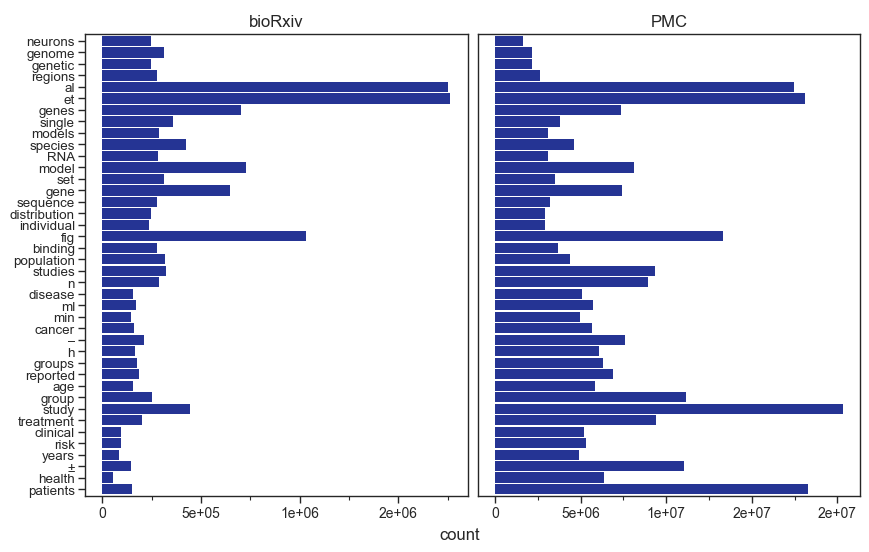

<ggplot: (-9223363272828717757)>


In [10]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/biorxiv_pmc_frequency_bar.svg")
print(g)

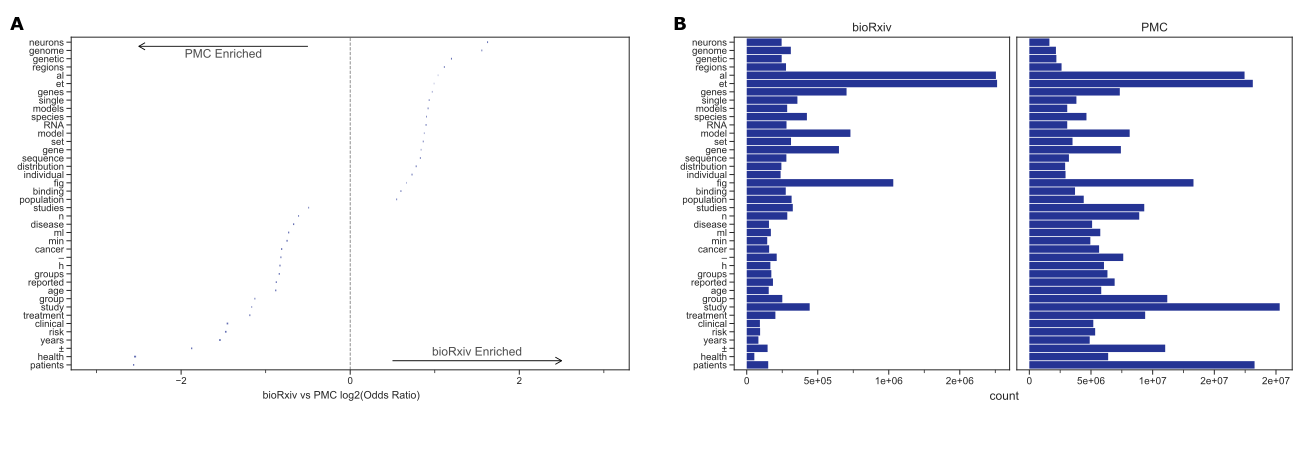

In [11]:
fig_output_path = "output/figures/biorxiv_vs_pubmed_central.png"

fig = plot_point_bar_figure(
    "output/svg_files/biorxiv_pmc_frequency_odds.svg",
    "output/svg_files/biorxiv_pmc_frequency_bar.svg",
)

# save generated SVG files
svg2png(bytestring=fig.to_str(), write_to=fig_output_path, dpi=75)

Image(fig_output_path)

# bioRxiv vs Reference

In [12]:
full_text_comparison = pd.read_csv(
    "output/comparison_stats/biorxiv_nytac_comparison.tsv", sep="\t"
)
full_text_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,time,615363,1578029,262494660,659277495,191.771606,0.979409
1,united,8293,1024026,262494660,659277495,610278.121742,0.020340
2,test,360585,138836,262494660,659277495,408282.815620,6.523090
3,increased,243041,109599,262494660,659277495,246821.120415,5.569558
4,office,2303,489148,262494660,659277495,304266.080589,0.011825


## Line Plots

In [13]:
full_plot_df = calculate_confidence_intervals(full_text_comparison)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
0,time,615363,1578029,262494660,659277495,191.771606,0.979409,0.976525,0.982302,-13.827287,1.744790e-43
1,united,8293,1024026,262494660,659277495,610278.121742,0.020340,0.019905,0.020784,-353.281948,0.000000e+00
2,test,360585,138836,262494660,659277495,408282.815620,6.523090,6.482822,6.563608,593.591214,0.000000e+00
3,increased,243041,109599,262494660,659277495,246821.120415,5.569558,5.529972,5.609427,471.889236,0.000000e+00
4,office,2303,489148,262494660,659277495,304266.080589,0.011825,0.011351,0.012319,-212.454777,0.000000e+00


In [14]:
plot_df = (
    full_plot_df.sort_values("odds_ratio", ascending=False)
    .head(subset)
    .append(
        full_plot_df.sort_values("odds_ratio", ascending=False).iloc[:-2].tail(subset)
    )
    .replace("rna", "RNA")
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x)),
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
58,°,302552,2,262494660,659277495,7.597517e+05,18.535421,16.535941,20.534901,18.169438,9.011731e-74
145,mm,238592,360,262494660,659277495,5.940637e+05,10.700931,10.551786,10.850075,140.627565,0.000000e+00
117,fig,1031812,2541,262494660,659277495,2.555250e+06,9.994166,9.938001,10.050331,348.768545,0.000000e+00
37,’,345652,1070,262494660,659277495,8.542093e+05,9.664163,9.577585,9.750742,218.780807,0.000000e+00
106,RNA,280074,1088,262494660,659277495,6.898414e+05,9.336583,9.250690,9.422477,213.051563,0.000000e+00


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_odds.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_odds.png


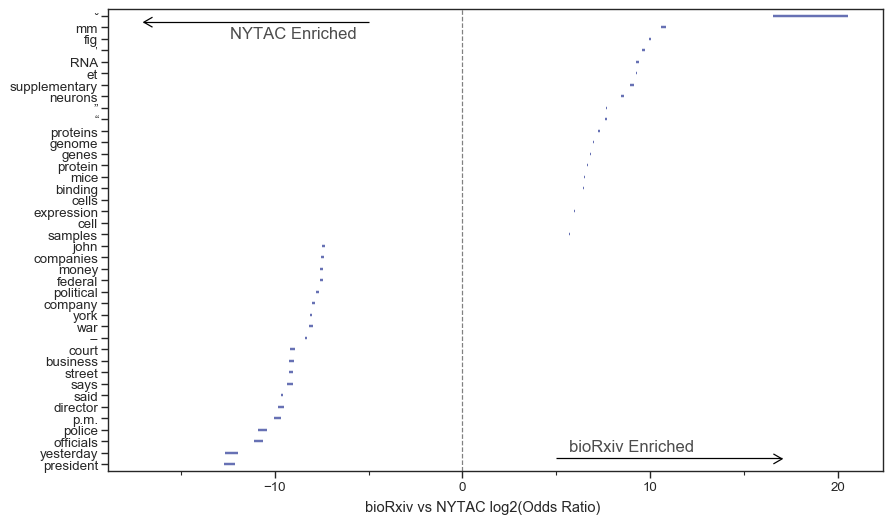

<ggplot: (8764025713058)>


In [15]:
g = (
    p9.ggplot(
        plot_df, p9.aes(y="lemma", x="lower_odds", xend="upper_odds", yend="lemma")
    )
    + p9.geom_segment(color="#253494", size=1, alpha=0.7)
    + p9.scale_y_discrete(
        limits=(plot_df.sort_values("odds_ratio", ascending=True).lemma.tolist())
    )
    + p9.geom_vline(p9.aes(xintercept=0), linetype="--", color="grey")
    + p9.annotate(
        "segment",
        x=5,
        xend=17,
        y=1.5,
        yend=1.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="bioRxiv Enriched", x=9, y=2.5, size=12, alpha=0.7)
    + p9.annotate(
        "segment",
        x=-5,
        xend=-17,
        y=39.5,
        yend=39.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="NYTAC Enriched", x=-9, y=38.5, size=12, alpha=0.7)
    + p9.theme_seaborn(context="paper", style="ticks", font_scale=1.1, font="Arial")
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(y=None, x="bioRxiv vs NYTAC log2(Odds Ratio)")
)

g.save("output/svg_files/biorxiv_nytac_frequency_odds.svg")
g.save("output/svg_files/biorxiv_nytac_frequency_odds.png", dpi=250)
print(g)

In [16]:
count_plot_df = create_lemma_count_df(plot_df, "bioRxiv", "NYTAC").assign(
    repository=lambda x: pd.Categorical(
        x.repository.tolist(), categories=["bioRxiv", "NYTAC"]
    )
)
count_plot_df.head()

,lemma,count,repository
0,°,302552,bioRxiv
1,mm,238592,bioRxiv
2,fig,1031812,bioRxiv
3,’,345652,bioRxiv
4,RNA,280074,bioRxiv


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/biorxiv_nytac_frequency_bar.svg


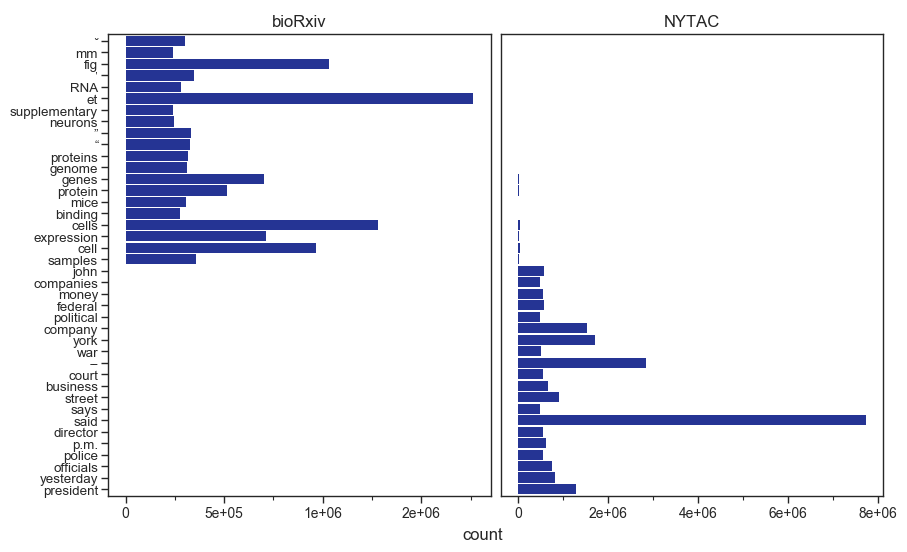

<ggplot: (-9223363272829414968)>


In [17]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/biorxiv_nytac_frequency_bar.svg")
print(g)

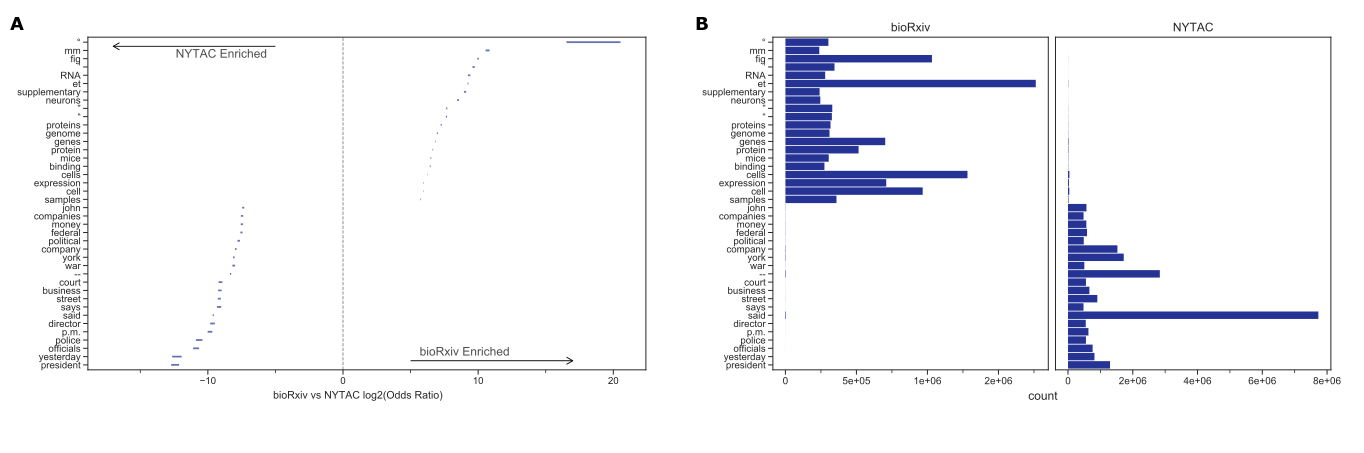

In [18]:
fig_output_path = "output/figures/biorxiv_vs_reference.png"

fig = plot_point_bar_figure(
    "output/svg_files/biorxiv_nytac_frequency_odds.svg",
    "output/svg_files/biorxiv_nytac_frequency_bar.svg",
)

# save generated SVG files
svg2png(bytestring=fig.to_str(), write_to=fig_output_path, dpi=75)

Image(fig_output_path)

# PMC vs Reference

In [19]:
full_text_comparison = pd.read_csv(
    "output/comparison_stats/pmc_nytac_comparison.tsv", sep="\t"
)
full_text_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,time,11258014,1578029,5365015381,659277495,2.314005e+04,0.876686
1,united,551100,1024026,5365015381,659277495,2.618264e+06,0.066133
2,test,6824993,138836,5365015381,659277495,8.336842e+05,6.040841
3,increased,6530384,109599,5365015381,659277495,8.810869e+05,7.321995
4,office,161045,489148,5365015381,659277495,1.473495e+06,0.040458


## Line Plots

In [20]:
full_plot_df = calculate_confidence_intervals(full_text_comparison)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
0,time,11258014,1578029,5365015381,659277495,2.314005e+04,0.876686,0.875225,0.878150,-154.645898,0.0
1,united,551100,1024026,5365015381,659277495,2.618264e+06,0.066133,0.065917,0.066350,-1625.267606,0.0
2,test,6824993,138836,5365015381,659277495,8.336842e+05,6.040841,6.008825,6.073028,663.359057,0.0
3,increased,6530384,109599,5365015381,659277495,8.810869e+05,7.321995,7.278409,7.365841,653.574352,0.0
4,office,161045,489148,5365015381,659277495,1.473495e+06,0.040458,0.040231,0.040686,-1116.331802,0.0


In [21]:
plot_df = (
    full_plot_df.sort_values("odds_ratio", ascending=False)
    .drop([17, 154])
    .head(subset)
    .append(
        full_plot_df.sort_values("odds_ratio", ascending=False).iloc[:-2].tail(subset)
    )
    .replace("rna", "RNA")
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x)),
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
120,\t\t\t\t,18199325,1,5365015381,659277495,4.211862e+06,21.092757,18.265075,23.920439,14.620385,2.082206e-48
104,±,11016756,1,5365015381,659277495,2.551201e+06,20.368572,17.540889,23.196254,14.118417,2.924866e-45
48,–,7614840,1,5365015381,659277495,1.763922e+06,19.835758,17.008075,22.663440,13.749099,5.156799e-43
100,,5160158,1,5365015381,659277495,1.195562e+06,19.274359,16.446677,22.102042,13.359966,1.036108e-40
58,°,8136102,2,5365015381,659277495,1.884558e+06,18.931282,16.931808,20.930755,18.557541,7.087561e-77


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/pmc_nytac_frequency_odds.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8202 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 9 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8202 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 9 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: S

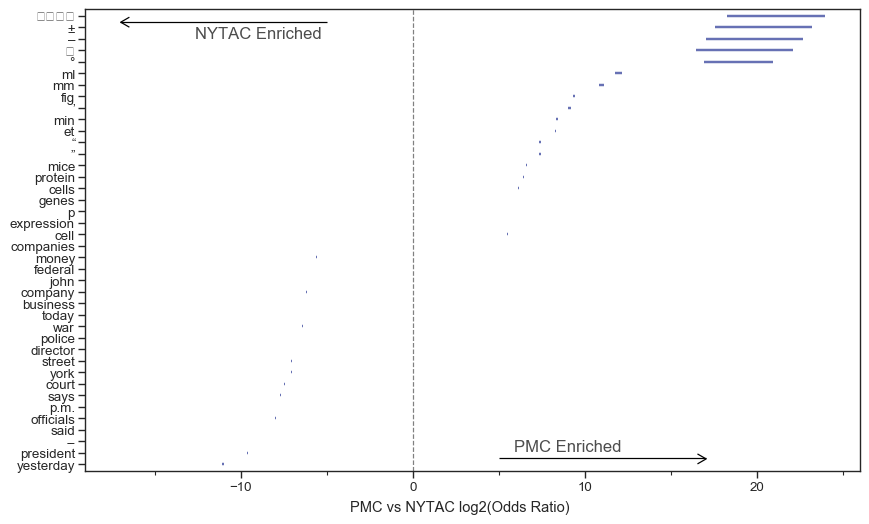

<ggplot: (-9223363272828680732)>


In [22]:
g = (
    p9.ggplot(
        plot_df, p9.aes(y="lemma", x="lower_odds", xend="upper_odds", yend="lemma")
    )
    + p9.geom_segment(color="#253494", size=1, alpha=0.7)
    + p9.scale_y_discrete(
        limits=(plot_df.sort_values("odds_ratio", ascending=True).lemma.tolist())
    )
    + p9.geom_vline(p9.aes(xintercept=0), linetype="--", color="grey")
    + p9.annotate(
        "segment",
        x=5,
        xend=17,
        y=1.5,
        yend=1.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="PMC Enriched", x=9, y=2.5, size=12, alpha=0.7)
    + p9.annotate(
        "segment",
        x=-5,
        xend=-17,
        y=39.5,
        yend=39.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="NYTAC Enriched", x=-9, y=38.5, size=12, alpha=0.7)
    + p9.theme_seaborn(context="paper", style="ticks", font_scale=1.1, font="Arial")
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(y=None, x="PMC vs NYTAC log2(Odds Ratio)")
)
g.save("output/svg_files/pmc_nytac_frequency_odds.svg")
g.save("output/svg_files/pmc_nytac_frequency_odds.png", dpi=250)
print(g)

In [23]:
count_plot_df = create_lemma_count_df(plot_df, "pmc", "reference").replace(
    {"pmc": "PMC", "reference": "NYTAC"}
)
count_plot_df.head()

,lemma,count,repository
0,\t\t\t\t,18199325,PMC
1,±,11016756,PMC
2,–,7614840,PMC
3,,5160158,PMC
4,°,8136102,PMC


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/pmc_nytac_frequency_bar.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8202 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 9 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8202 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 9 missing from current font.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Run

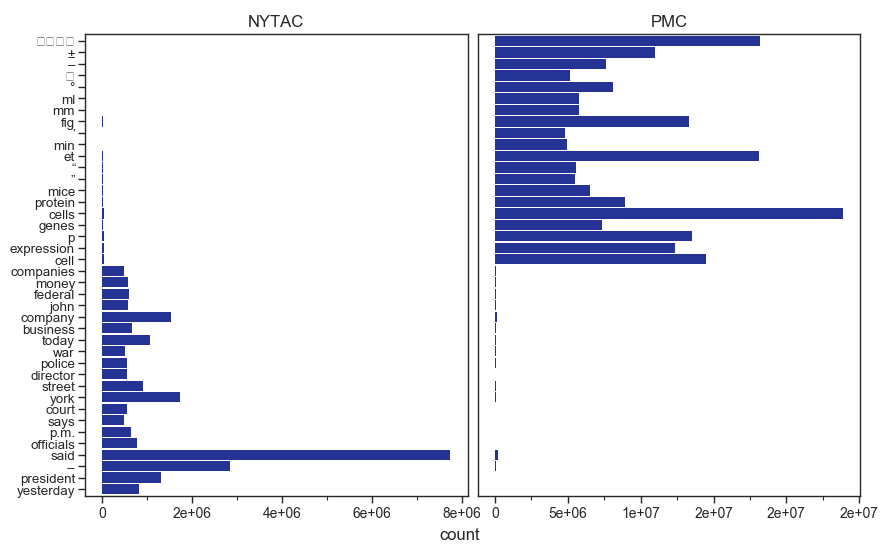

<ggplot: (8764025124840)>


In [24]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/pmc_nytac_frequency_bar.svg", dpi=75)
print(g)

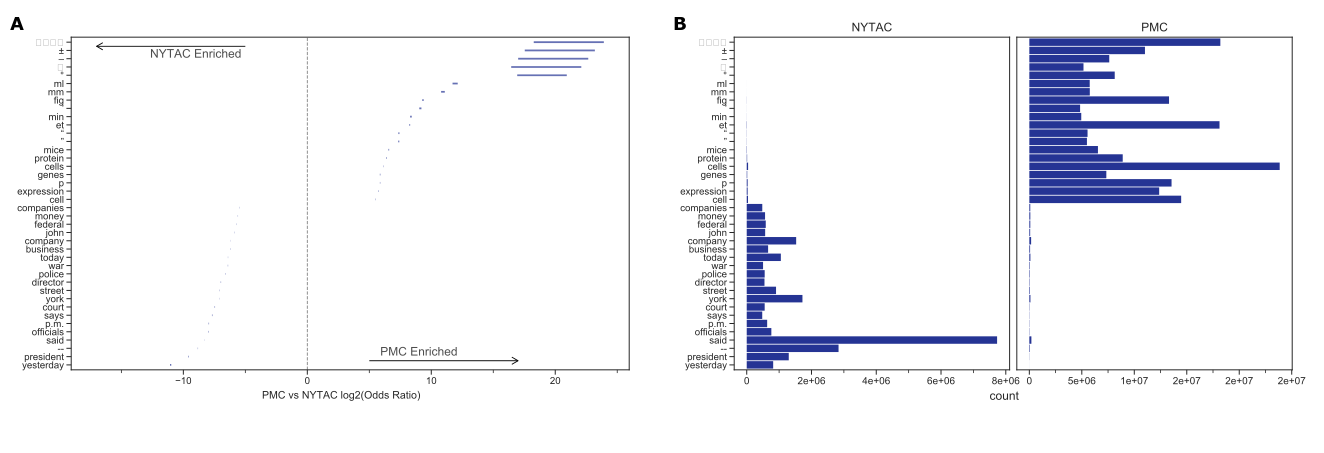

In [25]:
fig_output_path = "output/figures/pmc_vs_reference.png"

fig = plot_point_bar_figure(
    "output/svg_files/pmc_nytac_frequency_odds.svg",
    "output/svg_files/pmc_nytac_frequency_bar.svg",
)

# save generated SVG files
svg2png(bytestring=fig.to_str(), write_to=fig_output_path, dpi=75)

Image(fig_output_path)

# Preprint vs Published

In [26]:
preprint_published_comparison = pd.read_csv(
    "output/comparison_stats/preprint_to_published_comparison.tsv", sep="\t"
).assign(odds_ratio=lambda x: 1 / x.odds_ratio.values)
preprint_published_comparison.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio
0,time,275599,180575,120680972,82761371,227.157404,0.955413
1,test,164653,110948,120680972,82761371,20.503205,0.982564
2,increased,105992,61736,120680972,82761371,1053.576725,0.849330
3,model,333119,215834,120680972,82761371,423.091934,0.944782
4,al,773498,438016,120680972,82761371,10360.943830,0.825737


## Line Plot

In [27]:
full_plot_df = calculate_confidence_intervals(preprint_published_comparison)
full_plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
0,time,275599,180575,120680972,82761371,227.157404,0.955413,0.949754,0.961106,-15.048604,3.525973e-51
1,test,164653,110948,120680972,82761371,20.503205,0.982564,0.975107,0.990078,-4.525495,6.025438e-06
2,increased,105992,61736,120680972,82761371,1053.576725,0.849330,0.840940,0.857804,-32.243058,4.401583e-228
3,model,333119,215834,120680972,82761371,423.091934,0.944782,0.939672,0.949919,-20.529131,1.182717e-93
4,al,773498,438016,120680972,82761371,10360.943830,0.825737,0.822674,0.828812,-100.971118,0.000000e+00


In [28]:
plot_df = (
    full_plot_df.sort_values("odds_ratio", ascending=False)
    .iloc[3:]
    .head(subset)
    .append(full_plot_df.sort_values("odds_ratio", ascending=False).tail(subset))
    .assign(
        odds_ratio=lambda x: x.odds_ratio.apply(lambda x: np.log2(x)),
        lower_odds=lambda x: x.lower_odds.apply(lambda x: np.log2(x)),
        upper_odds=lambda x: x.upper_odds.apply(lambda x: np.log2(x)),
    )
)
plot_df.head()

,lemma,corpus_one_a,corpus_two_b,corpus_one_c,corpus_two_d,log_likelihood,odds_ratio,lower_odds,upper_odds,z_value,p_value
39,file,32152,98692,120680972,82761371,65155.577223,2.162193,2.144031,2.180356,233.335507,0.0
17,additional,71947,110165,120680972,82761371,28908.580008,1.158828,1.145268,1.172388,167.498533,0.0
61,±,66441,88259,120680972,82761371,16773.865753,0.953838,0.939309,0.968368,128.672306,0.0
30,–,95558,120121,120680972,82761371,19673.240370,0.874209,0.861945,0.886472,139.715415,0.0
45,supplementary,117573,134462,120680972,82761371,16393.903610,0.737810,0.726513,0.749108,128.001830,0.0


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_odds.svg
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_odds.png


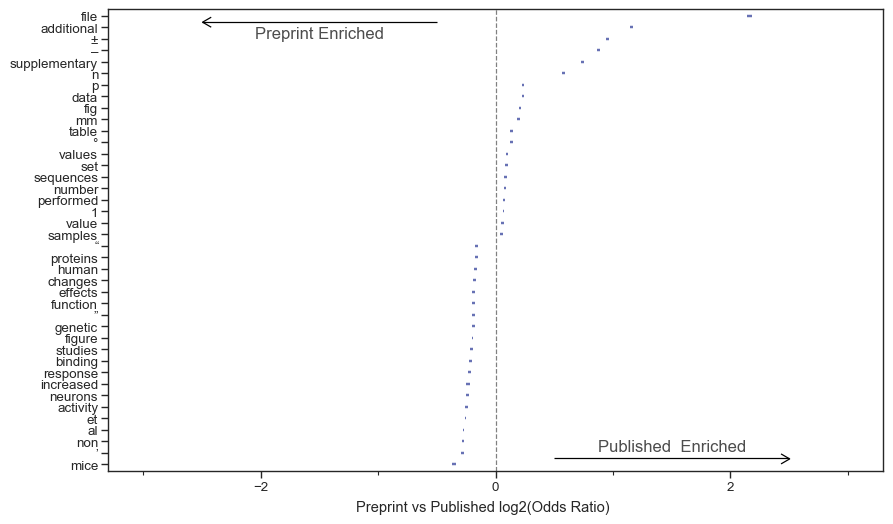

<ggplot: (-9223363272829624660)>


In [29]:
g = (
    p9.ggplot(
        plot_df, p9.aes(y="lemma", x="lower_odds", xend="upper_odds", yend="lemma")
    )
    + p9.geom_segment(color="#253494", size=1, alpha=0.7)
    + p9.scale_y_discrete(
        limits=(plot_df.sort_values("odds_ratio", ascending=True).lemma.tolist())
    )
    + p9.scale_x_continuous(limits=(-3, 3))
    + p9.geom_vline(p9.aes(xintercept=0), linetype="--", color="grey")
    + p9.annotate(
        "segment",
        x=0.5,
        xend=2.5,
        y=1.5,
        yend=1.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="Published  Enriched", x=1.5, y=2.5, size=12, alpha=0.7)
    + p9.annotate(
        "segment",
        x=-0.5,
        xend=-2.5,
        y=39.5,
        yend=39.5,
        colour="black",
        size=0.5,
        alpha=1,
        arrow=p9.arrow(length=0.1),
    )
    + p9.annotate("text", label="Preprint Enriched", x=-1.5, y=38.5, size=12, alpha=0.7)
    + p9.theme_seaborn(context="paper", style="ticks", font_scale=1.1, font="Arial")
    + p9.theme(
        figure_size=(10, 6),
        panel_grid_minor=p9.element_blank(),
    )
    + p9.labs(y=None, x="Preprint vs Published log2(Odds Ratio)")
)
g.save("output/svg_files/preprint_published_frequency_odds.svg")
g.save("output/svg_files/preprint_published_frequency_odds.png", dpi=250)
print(g)

In [30]:
count_plot_df = create_lemma_count_df(plot_df, "preprint", "published").replace(
    {"preprint": "Preprint", "published": "Published"}
)
count_plot_df.head()

,lemma,count,repository
0,file,32152,Preprint
1,additional,71947,Preprint
2,±,66441,Preprint
3,–,95558,Preprint
4,supplementary,117573,Preprint


/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 6 in image.
/home/danich1/anaconda3/envs/annorxiver/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: output/svg_files/preprint_published_frequency_bar.svg


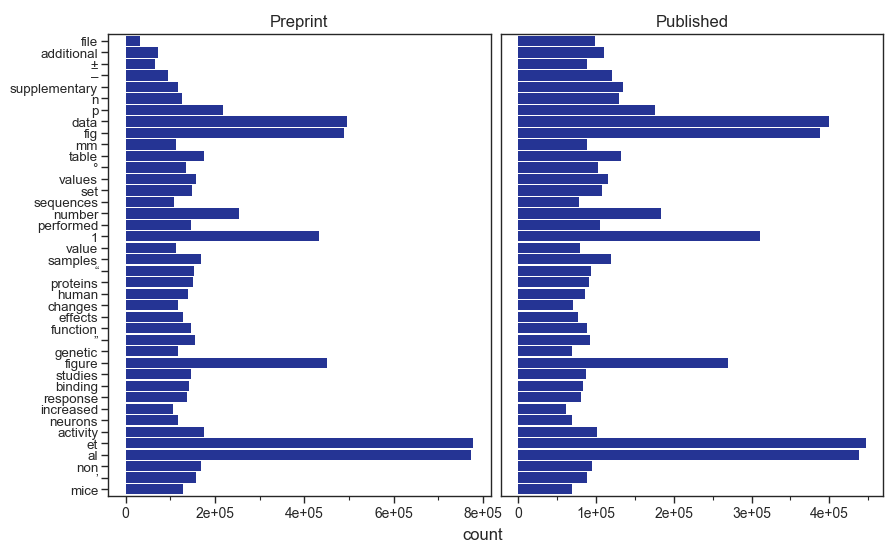

<ggplot: (8764025253724)>


In [31]:
g = plot_bargraph(count_plot_df, plot_df)
g.save("output/svg_files/preprint_published_frequency_bar.svg", dpi=75)
print(g)

In [ ]:
fig_output_path = "output/figures/preprint_published_comparison.png"

fig = plot_point_bar_figure(
    "output/svg_files/preprint_published_frequency_odds.svg",
    "output/svg_files/preprint_published_frequency_bar.svg",
)

# save generated SVG files
svg2png(bytestring=fig.to_str(), write_to=fig_output_path, dpi=75)

Image(fig_output_path)